In [13]:
#!pip install  nbconvert[webpdf]
import nbconvert
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
excel_file = "Capital_Merged1.xlsx"  # Replace with the actual file path
sheet_name = "Excess bank capital"

In [3]:
def parse_quarter(quarter_str):
    parts = quarter_str.split("Q")
    if len(parts) != 2:
        # Handle invalid input gracefully
        return None

    year = parts[1].strip()
    quarter = parts[0].strip()
    
    if not year or not quarter:
        # Handle cases where year or quarter is empty
        return None

    try:
        year = int(year)
        quarter = int(quarter)
        
        if quarter < 1 or quarter > 4:
            # Handle an invalid quarter
            return None
    except ValueError:
        # Handle cases where year or quarter is not an integer
        return None

    # Map quarters to month values
    month = (quarter - 1) * 3 + 1

    return pd.to_datetime(f"{year}-{month:02d}-01")






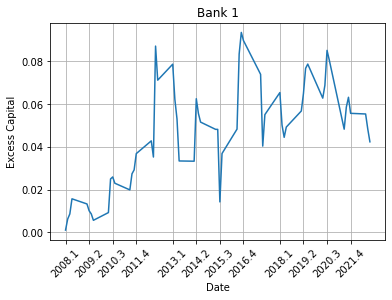

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the specified sheet into a DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Continue with plotting code
date = df["Date"]
Bank1 = df['Bank 1']
plt.plot(date, Bank1)
plt.title('Bank 1')
plt.xlabel('Date')
plt.ylabel('Excess Capital')
plt.grid(True)

# Set a subset of ticks to make labels less crowded
plt.xticks(date[::5], rotation=45)

plt.show()


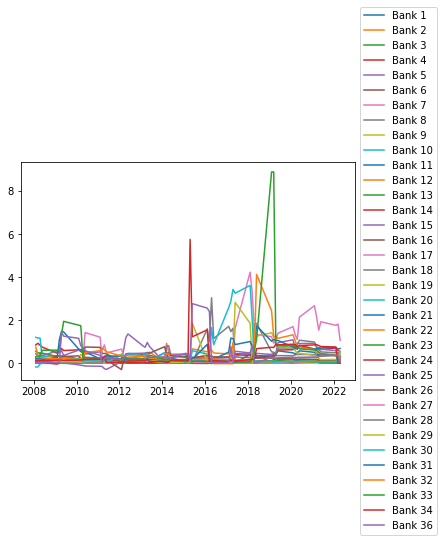

In [7]:
Data = df.iloc[:,1:]
plt.plot(date,Data)
plt.legend(df.iloc[:,2:].columns)
legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
np.std(Data)/np.mean(Data)

Bank 1     0.104719
Bank 2     0.072832
Bank 3     0.058256
Bank 4     0.074717
Bank 5     0.082135
Bank 6     0.117249
Bank 7     0.272012
Bank 8     0.594086
Bank 9     0.070564
Bank 10    0.248445
Bank 11    0.149876
Bank 12    0.175223
Bank 13    0.143815
Bank 14    0.328884
Bank 15    0.375638
Bank 16    0.345463
Bank 17    0.975533
Bank 18    0.404780
Bank 19    0.259227
Bank 20    0.321699
Bank 21    0.727768
Bank 22    0.872560
Bank 23    0.625095
Bank 24    1.244892
Bank 25    1.217122
Bank 26    0.698502
Bank 27    3.885544
Bank 28    2.641562
Bank 29    2.374628
Bank 30    3.783899
Bank 31    1.711432
Bank 32    2.668986
Bank 33    6.797963
Bank 34    3.367566
Bank 36    2.471582
dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()




In [10]:
DataNorm = scaler.fit_transform(Data)

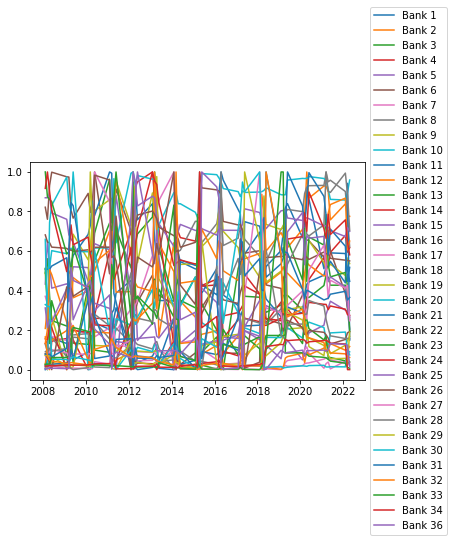

In [11]:
plt.plot(date, DataNorm)
plt.legend(df.iloc[:,2:].columns)
legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))

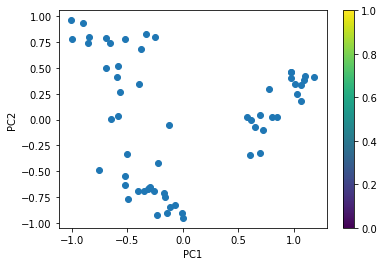

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=5)
PC = pca.fit_transform(DataNorm)
plt.scatter(PC[:,0], PC[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

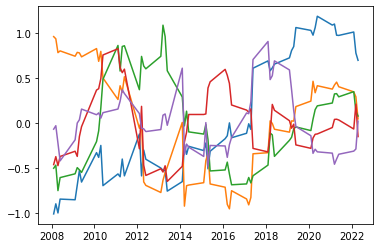

In [13]:
plt.plot(date, PC)
#plt.plot(date, PC[:,1])

Text(0.5, 1.0, 'Principal Components for Bank Capital Holdings')

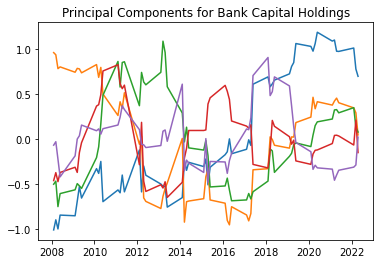

In [14]:
plt.plot(date,PC)
plt.title('Principal Components for Bank Capital Holdings')


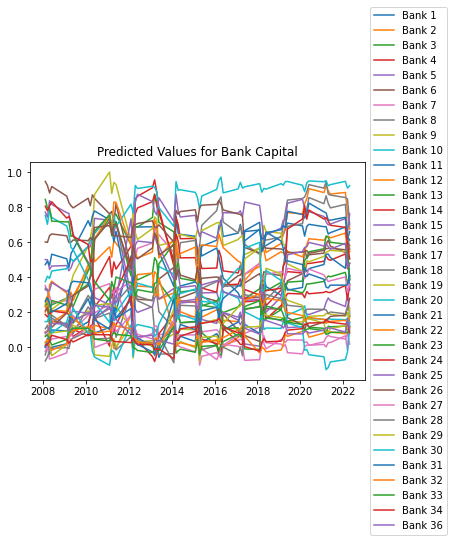

In [15]:
DataNormhat = pca.inverse_transform(PC)
plt.plot(date, DataNormhat)
plt.title('Predicted Values for Bank Capital')
plt.legend(df.iloc[:,1:].columns)

legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))


33.493909400125446


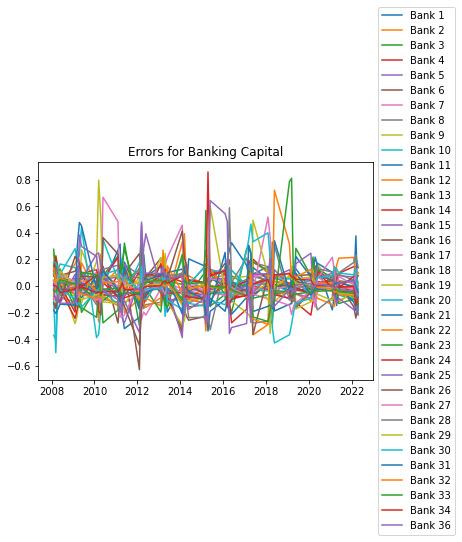

In [16]:
ERROR = DataNorm - DataNormhat
plt.plot(date,ERROR)
plt.title('Errors for Banking Capital')
plt.legend(df.iloc[:,:].columns)
legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))
SEE = np.sum(ERROR**2,axis=0)
SEE1 = np.sum(SEE)
print(SEE1)


In [17]:
variance_ratio = pca.explained_variance_ratio_
junk = np.var(DataNormhat,0)
junk1 = np.var(DataNorm,0)
RSQ_PC_DATA = junk/junk1
print(RSQ_PC_DATA)
print(np.min(RSQ_PC_DATA))
# Calculate the total percentage of the variance captured by the first two principal components
total_variance = np.sum(variance_ratio[:2])
percent_total_variance = total_variance * 100
print(percent_total_variance)

[0.76718087 0.75336455 0.69342145 0.79827102 0.75430392 0.80817233
 0.76586706 0.92319922 0.61659058 0.70200003 0.73168993 0.82441372
 0.64796889 0.86520318 0.68458976 0.4181675  0.35855612 0.9141762
 0.12843503 0.57042191 0.91706599 0.81926352 0.72751987 0.92820455
 0.52969904 0.55997792 0.71831859 0.44508915 0.53175791 0.49499851
 0.56608128 0.27581657 0.16448995 0.15270141 0.19605026]
0.1284350251033084
43.24584091633673


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load data into a NumPy array
# Define the dimensions of the input and latent spaces
input_dim = DataNorm.shape[1]
latent_dim = 1

# Define the encoder

# inputs = Input(shape=(input_dim,))
# encoded = Dense(100, activation='relu')(inputs)
# encoded = Dense(50, activation='relu')(encoded)
# encoded = Dense(2, activation='relu')(encoded)
# decoded = Dense(50, activation='relu')(encoded)
# decoded = Dense(100, activation='relu')(encoded)
# decoded = Dense(input_dim, activation='linear')(decoded)

inputs = Input(shape=(input_dim,))
encoded = Dense(30, activation='relu')(inputs)
encoded = Dense(5, activation='sigmoid')(encoded)
decoded = Dense(30, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)
 
autoencoder = Model(inputs, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mae')

# Train the autoencoder
autoencoder.fit(DataNorm, DataNorm, epochs=10000)

# Extract the encoder model for dimensionality reduction
encoder = Model(inputs, encoded)
encoded_DataNorm = encoder.predict(DataNorm)

Epoch 1/10000
2/2 [==============================] - 1s 5ms/step - loss: 0.3010
Epoch 2/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2988
Epoch 3/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2966
Epoch 4/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2945
Epoch 5/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2924
Epoch 6/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2903
Epoch 7/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2882
Epoch 8/10000
2/2 [==============================] - 0s 989us/step - loss: 0.2861
Epoch 9/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2839
Epoch 10/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2817
Epoch 11/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2794
Epoch 12/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.2771
Epoch 13/10000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1507
Epoch 201/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1504
Epoch 202/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1501
Epoch 203/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1498
Epoch 204/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1495
Epoch 205/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1492
Epoch 206/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1489
Epoch 207/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1486
Epoch 208/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1483
Epoch 209/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1480
Epoch 210/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1477
Epoch 211/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1474
Epoch 212/10000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.1138
Epoch 399/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1137
Epoch 400/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1136
Epoch 401/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1134
Epoch 402/10000
2/2 [==============================] - 0s 998us/step - loss: 0.1134
Epoch 403/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1133
Epoch 404/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1131
Epoch 405/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1131
Epoch 406/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1129
Epoch 407/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1129
Epoch 408/10000
2/2 [==============================] - 0s 998us/step - loss: 0.1128
Epoch 409/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1127
Epoch 410/10000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.1010
Epoch 597/10000
2/2 [==============================] - 0s 998us/step - loss: 0.1009
Epoch 598/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1009
Epoch 599/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1008
Epoch 600/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1008
Epoch 601/10000
2/2 [==============================] - 0s 998us/step - loss: 0.1008
Epoch 602/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1007
Epoch 603/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1007
Epoch 604/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1006
Epoch 605/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1006
Epoch 606/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1005
Epoch 607/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1005
Epoch 608/10000
2/2 [=====

2/2 [==============================] - 0s 998us/step - loss: 0.0923
Epoch 795/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0923
Epoch 796/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0922
Epoch 797/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0922
Epoch 798/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0922
Epoch 799/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 800/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 801/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0920
Epoch 802/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0920
Epoch 803/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0919
Epoch 804/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0919
Epoch 805/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0918
Epoch 806/10000
2/2 [=======

2/2 [==============================] - 0s 989us/step - loss: 0.0845
Epoch 993/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0845
Epoch 994/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0844
Epoch 995/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0844
Epoch 996/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0844
Epoch 997/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0843
Epoch 998/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0843
Epoch 999/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0843
Epoch 1000/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0842
Epoch 1001/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0842
Epoch 1002/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0841
Epoch 1003/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0841
Epoch 1004/10000
2

2/2 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 1189/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0793
Epoch 1190/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0794
Epoch 1191/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 1192/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 1193/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 1194/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 1195/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0794
Epoch 1196/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 1197/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0793
Epoch 1198/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 1199/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 1200/10

2/2 [==============================] - 0s 997us/step - loss: 0.0771
Epoch 1385/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0771
Epoch 1386/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 1387/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 1388/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0771
Epoch 1389/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 1390/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 1391/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 1392/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 1393/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 1394/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0770
Epoch 1395/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 1396/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 1483/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 1484/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0759
Epoch 1485/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 1486/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 1487/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 1488/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 1489/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0758
Epoch 1490/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 1491/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 1492/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0758
Epoch 1493/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 1494/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 1679/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0741
Epoch 1680/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 1681/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0741
Epoch 1682/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 1683/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 1684/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 1685/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 1686/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 1687/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 1688/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 1689/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 1690/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 1777/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 1778/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0732
Epoch 1779/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 1780/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 1781/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0732
Epoch 1782/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0732
Epoch 1783/10000
2/2 [==============================] - 0s 0s/step - loss: 0.0732
Epoch 1784/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 1785/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 1786/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0731
Epoch 1787/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 1788/100

2/2 [==============================] - 0s 2ms/step - loss: 0.0725
Epoch 1875/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0724
Epoch 1876/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 1877/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 1878/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0725
Epoch 1879/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0725
Epoch 1880/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 1881/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0725
Epoch 1882/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0724
Epoch 1883/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 1884/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 1885/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0724
Epoch 1886/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 1973/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0717
Epoch 1974/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0717
Epoch 1975/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 1976/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 1977/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0717
Epoch 1978/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0717
Epoch 1979/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 1980/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0717
Epoch 1981/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0717
Epoch 1982/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 1983/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0716
Epoch 198

2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2071/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2072/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0710
Epoch 2073/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2074/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2075/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0710
Epoch 2076/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0710
Epoch 2077/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2078/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2079/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0709
Epoch 2080/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 2081/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 2082/10

2/2 [==============================] - 0s 997us/step - loss: 0.0703
Epoch 2169/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0703
Epoch 2170/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0702
Epoch 2171/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 2172/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 2173/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 2174/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 2175/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 2176/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0702
Epoch 2177/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 2178/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0702
Epoch 2179/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 2180/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2267/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2268/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2269/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2270/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2271/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2272/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0695
Epoch 2273/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2274/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0694
Epoch 2275/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0694
Epoch 2276/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2277/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2278/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 2365/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 2366/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 2367/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0689
Epoch 2368/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 2369/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 2370/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 2371/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0689
Epoch 2372/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 2373/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 2374/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 2375/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0689
Epoch 2376/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 2561/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0677
Epoch 2562/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0677
Epoch 2563/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 2564/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0678
Epoch 2565/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0677
Epoch 2566/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 2567/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 2568/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 2569/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0677
Epoch 2570/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 2571/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 2572/10

2/2 [==============================] - 0s 998us/step - loss: 0.0667
Epoch 2757/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 2758/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 2759/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0668
Epoch 2760/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0667
Epoch 2761/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 2762/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 2763/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0667
Epoch 2764/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0667
Epoch 2765/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 2766/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 2767/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0667
Epoch 276

2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 2855/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 2856/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 2857/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 2858/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0662
Epoch 2859/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 2860/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0662
Epoch 2861/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 2862/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 2863/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 2864/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0662
Epoch 2865/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 2866/1000

2/2 [==============================] - 0s 997us/step - loss: 0.0654
Epoch 3051/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 3052/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 3053/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 3054/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 3055/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 3056/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0654
Epoch 3057/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 3058/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 3059/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0653
Epoch 3060/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 3061/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 3062/1000

2/2 [==============================] - 0s 998us/step - loss: 0.0649
Epoch 3149/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 3150/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 3151/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 3152/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0648
Epoch 3153/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 3154/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0649
Epoch 3155/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0649
Epoch 3156/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 3157/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 3158/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0648
Epoch 3159/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 3160/

2/2 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 3345/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 3346/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 3347/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 3348/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 3349/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 3350/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0640
Epoch 3351/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 3352/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 3353/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0640
Epoch 3354/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 3355/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 3356/10000


2/2 [==============================] - 0s 998us/step - loss: 0.0633
Epoch 3541/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 3542/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 3543/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0633
Epoch 3544/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0633
Epoch 3545/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 3546/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 3547/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0633
Epoch 3548/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 3549/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 3550/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 3551/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0633
Epoch 3552/

2/2 [==============================] - 0s 998us/step - loss: 0.0630
Epoch 3639/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 3640/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 3641/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0630
Epoch 3642/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 3643/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 3644/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 3645/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0630
Epoch 3646/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 3647/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 3648/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0630
Epoch 3649/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 3650/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 3737/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0627
Epoch 3738/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 3739/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 3740/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 3741/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0627
Epoch 3742/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 3743/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 3744/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0627
Epoch 3745/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 3746/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 3747/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0627
Epoch 3748/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 3933/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 3934/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0622
Epoch 3935/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0622
Epoch 3936/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 3937/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 3938/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0622
Epoch 3939/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 3940/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 3941/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 3942/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0622
Epoch 3943/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 3944/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 4031/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0620
Epoch 4032/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 4033/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 4034/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 4035/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0619
Epoch 4036/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 4037/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 4038/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 4039/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0619
Epoch 4040/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0619
Epoch 4041/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 4042/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 4129/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0617
Epoch 4130/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 4131/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 4132/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 4133/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0618
Epoch 4134/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0617
Epoch 4135/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 4136/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 4137/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0618
Epoch 4138/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 4139/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 4140/10

2/2 [==============================] - 0s 997us/step - loss: 0.0613
Epoch 4325/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 4326/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 4327/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 4328/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 4329/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0612
Epoch 4330/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0612
Epoch 4331/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 4332/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 4333/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0613
Epoch 4334/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 4335/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 4336/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 4423/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0610
Epoch 4424/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 4425/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 4426/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 4427/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0610
Epoch 4428/10000
2/2 [==============================] - 0s 995us/step - loss: 0.0610
Epoch 4429/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 4430/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 4431/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0610
Epoch 4432/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 4433/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 4434/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 4521/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 4522/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 4523/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 4524/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 4525/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0608
Epoch 4526/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 4527/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 4528/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 4529/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 4530/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 4531/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0608
Epoch 4532/10000
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 4717/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 4718/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 4719/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0604
Epoch 4720/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0603
Epoch 4721/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 4722/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 4723/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0604
Epoch 4724/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 4725/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 4726/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 4727/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0604
Epoch 4728/10

2/2 [==============================] - 0s 996us/step - loss: 0.0599
Epoch 4913/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 4914/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 4915/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 4916/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 4917/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0599
Epoch 4918/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0599
Epoch 4919/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 4920/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 4921/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0599
Epoch 4922/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 4923/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 4924/10

2/2 [==============================] - 0s 997us/step - loss: 0.0597
Epoch 5011/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0597
Epoch 5012/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 5013/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 5014/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0597
Epoch 5015/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0597
Epoch 5016/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 5017/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 5018/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 5019/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0597
Epoch 5020/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 5021/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0597
Epoch 5022/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 5207/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 5208/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 5209/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0593
Epoch 5210/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0593
Epoch 5211/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 5212/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 5213/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 5214/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 5215/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 5216/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0593
Epoch 5217/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 5218/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5403/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5404/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5405/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5406/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5407/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5408/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 5409/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5410/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5411/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5412/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5413/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5414/10000
2/2 

2/2 [==============================] - 0s 998us/step - loss: 0.0586
Epoch 5599/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 5600/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0586
Epoch 5601/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 5602/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 5603/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0586
Epoch 5604/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 5605/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 5606/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0586
Epoch 5607/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 5608/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 5609/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 5610/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 5795/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0583
Epoch 5796/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 5797/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 5798/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0583
Epoch 5799/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 5800/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 5801/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0583
Epoch 5802/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 5803/10000
2/2 [==============================] - 0s 1ms/step - loss: 0.0583
Epoch 5804/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 5805/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 5806/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 5991/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 5992/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 5993/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0580
Epoch 5994/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 5995/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 5996/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 5997/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0580
Epoch 5998/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0580
Epoch 5999/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 6000/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 6001/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0579
Epoch 6002/10

2/2 [==============================] - 0s 994us/step - loss: 0.0577
Epoch 6187/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 6188/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 6189/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 6190/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 6191/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0577
Epoch 6192/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0577
Epoch 6193/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 6194/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 6195/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 6196/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 6197/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0577
Epoch 6198/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 6285/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0577
Epoch 6286/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 6287/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 6288/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0576
Epoch 6289/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 6290/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0577
Epoch 6291/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 6292/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 6293/10000
2/2 [==============================] - 0s 988us/step - loss: 0.0576
Epoch 6294/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 6295/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0576
Epoch 6296/

2/2 [==============================] - 0s 998us/step - loss: 0.0574
Epoch 6383/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 6384/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0574
Epoch 6385/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 6386/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 6387/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0574
Epoch 6388/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0574
Epoch 6389/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 6390/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 6391/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0574
Epoch 6392/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 6393/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0574
Epoch 639

2/2 [==============================] - 0s 996us/step - loss: 0.0573
Epoch 6481/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 6482/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 6483/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 6484/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 6485/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 6486/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 6487/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0572
Epoch 6488/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 6489/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 6490/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0573
Epoch 6491/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0573
Epoch 6492/10

2/2 [==============================] - 0s 997us/step - loss: 0.0571
Epoch 6579/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6580/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6581/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6582/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0571
Epoch 6583/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6584/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6585/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6586/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0571
Epoch 6587/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6588/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6589/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 6590/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 6677/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 6678/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 6679/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 6680/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 6681/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0570
Epoch 6682/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 6683/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 6684/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0569
Epoch 6685/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0569
Epoch 6686/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 6687/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 6688/1000

2/2 [==============================] - 0s 997us/step - loss: 0.0566
Epoch 6873/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 6874/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0566
Epoch 6875/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 6876/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 6877/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 6878/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0566
Epoch 6879/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 6880/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0566
Epoch 6881/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 6882/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 6883/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 6884/10

2/2 [==============================] - 0s 998us/step - loss: 0.0565
Epoch 6971/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 6972/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 6973/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0565
Epoch 6974/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0565
Epoch 6975/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 6976/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 6977/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0565
Epoch 6978/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 6979/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 6980/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 6981/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 6982/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 7069/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 7070/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0563
Epoch 7071/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 7072/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 7073/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 7074/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 7075/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 7076/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 7077/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 7078/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0563
Epoch 7079/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 7080/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 7167/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0561
Epoch 7168/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 7169/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 7170/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 7171/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 7172/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 7173/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 7174/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0561
Epoch 7175/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 7176/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 7177/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0561
Epoch 7178/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7265/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7266/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7267/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7268/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0559
Epoch 7269/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7270/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7271/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7272/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0559
Epoch 7273/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0559
Epoch 7274/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7275/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7276/1000

2/2 [==============================] - 0s 997us/step - loss: 0.0557
Epoch 7363/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0557
Epoch 7364/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 7365/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0557
Epoch 7366/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 7367/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 7368/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 7369/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0557
Epoch 7370/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 7371/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 7372/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 7373/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0557
Epoch 7374/

2/2 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 7559/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 7560/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0555
Epoch 7561/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0554
Epoch 7562/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 7563/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 7564/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0555
Epoch 7565/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 7566/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 7567/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 7568/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 7569/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0554
Epoch 7570/10

2/2 [==============================] - 0s 998us/step - loss: 0.0552
Epoch 7657/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0552
Epoch 7658/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 7659/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 7660/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 7661/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 7662/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0553
Epoch 7663/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 7664/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 7665/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 7666/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 7667/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 7668/1000

2/2 [==============================] - 0s 998us/step - loss: 0.0549
Epoch 7853/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 7854/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 7855/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0549
Epoch 7856/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 7857/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 7858/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 7859/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0549
Epoch 7860/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 7861/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 7862/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 7863/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 7864/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 7951/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 7952/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0548
Epoch 7953/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 7954/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 7955/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 7956/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0548
Epoch 7957/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 7958/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 7959/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 7960/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 7961/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 7962/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 8049/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 8050/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0547
Epoch 8051/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0547
Epoch 8052/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 8053/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 8054/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0547
Epoch 8055/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 8056/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 8057/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 8058/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0547
Epoch 8059/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 8060/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8147/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8148/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8149/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8150/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8151/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0545
Epoch 8152/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0545
Epoch 8153/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8154/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0545
Epoch 8155/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8156/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8157/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8158/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 8245/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 8246/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 8247/10000
2/2 [==============================] - 0s 994us/step - loss: 0.0544
Epoch 8248/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 8249/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8250/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8251/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0544
Epoch 8252/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 8253/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 8254/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 8255/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8256/10000


2/2 [==============================] - 0s 996us/step - loss: 0.0542
Epoch 8441/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 8442/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0542
Epoch 8443/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0542
Epoch 8444/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 8445/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 8446/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0541
Epoch 8447/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 8448/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 8449/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 8450/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 8451/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 8452/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8637/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0539
Epoch 8638/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8639/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8640/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8641/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0539
Epoch 8642/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8643/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8644/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8645/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0539
Epoch 8646/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8647/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8648/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 8735/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 8736/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0538
Epoch 8737/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 8738/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 8739/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0537
Epoch 8740/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 8741/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8742/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 8743/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 8744/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 8745/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0538
Epoch 8746/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 8931/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 8932/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 8933/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 8934/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 8935/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 8936/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 8937/10000
2/2 [==============================] - 0s 981us/step - loss: 0.0537
Epoch 8938/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 8939/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 8940/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 8941/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0536
Epoch 8942/10000


2/2 [==============================] - 0s 998us/step - loss: 0.0535
Epoch 9029/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9030/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0534
Epoch 9031/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0534
Epoch 9032/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0534
Epoch 9033/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 9034/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0534
Epoch 9035/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0534
Epoch 9036/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9037/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 9038/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9039/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 904

2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9127/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9128/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9129/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9130/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9131/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0534
Epoch 9132/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9133/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9134/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0534
Epoch 9135/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0533
Epoch 9136/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9137/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9138/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9225/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9226/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0533
Epoch 9227/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9228/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0532
Epoch 9229/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9230/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0533
Epoch 9231/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9232/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9233/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9234/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 9235/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 9236/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 9323/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9324/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9325/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0531
Epoch 9326/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0532
Epoch 9327/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9328/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 9329/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9330/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 9331/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9332/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 9333/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0531
Epoch 9334/1000

2/2 [==============================] - 0s 998us/step - loss: 0.0531
Epoch 9421/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 9422/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 9423/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0531
Epoch 9424/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9425/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9426/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9427/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 9428/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9429/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0530
Epoch 9430/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 9431/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 9432/1000

2/2 [==============================] - 0s 997us/step - loss: 0.0529
Epoch 9617/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 9618/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 9619/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 9620/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0529
Epoch 9621/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 9622/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 9623/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0528
Epoch 9624/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 9625/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0528
Epoch 9626/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 9627/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0528
Epoch 9628/

2/2 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 9813/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 9814/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 9815/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 9816/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0527
Epoch 9817/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0527
Epoch 9818/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 9819/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 9820/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 9821/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0527
Epoch 9822/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 9823/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0527
Epoch 9824/10

2/2 [==============================] - 0s 2ms/step
23.667751936176124
[0.75468195 0.83297839 0.85428642 0.77794399 0.67336054 0.8343879
 0.95152112 1.01175489 0.62535427 0.79069605 0.88677592 0.88869241
 0.90811212 0.84260512 0.8451234  0.39911091 0.8929149  0.91265353
 0.72123185 0.71662523 0.9323593  0.85252886 0.91877814 1.01131912
 0.82873515 0.67762639 0.66093008 0.7654832  0.78697736 0.9059328
 0.63174988 0.34752715 0.06929949 0.1463084  0.07117289]
1.0117548891241257


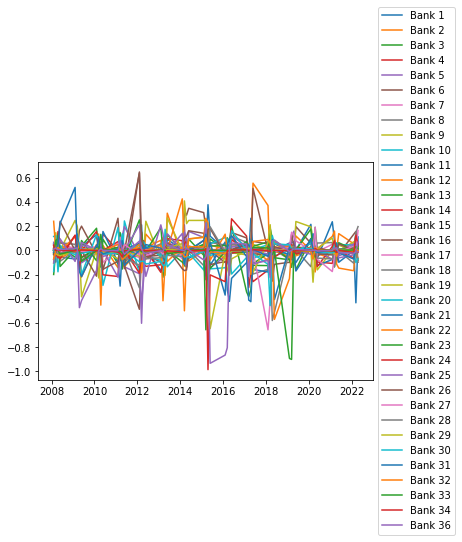

In [19]:
encoder = Model(inputs, encoded)
encoded_DataNorm = encoder.predict(DataNorm)
DataNormhat1 = autoencoder.predict(DataNorm)
plt.plot(date, DataNormhat1-DataNorm)
plt.legend(df.iloc[:,1:].columns)
legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))

junk = np.var(DataNormhat1,axis=0)

junk1 = np.var(DataNorm, axis= 0)

ERROR = DataNormhat1 - DataNorm
SEE = np.sum(ERROR**2, axis=0)
SEE1 = np.sum(SEE)
print(SEE1)
RSQ_RET_NPC = junk/junk1
print(RSQ_RET_NPC)
print(np.max(RSQ_RET_NPC))

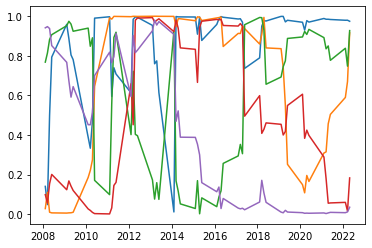

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#encoded_DataNorm= scaler.fit_transform(encoded_DataNorm)
#encoded_HK= scaler.fit_transform(encoded_HK)
plt.plot(date, encoded_DataNorm)


The DataFrame.interpolate() method in pandas provides several options and parameters that allow you to customize the interpolation process. Here are some of the key options for the DataFrame.interpolate() method:

Method (method):

This parameter specifies the interpolation method to use. It can take values like 'linear', 'polynomial', 'spline', 'barycentric', 'krogh', 'piecewise_polynomial', 'spline', 'akima', etc., depending on the method you want to apply.
Axis (axis):

You can specify whether the interpolation should be performed along rows (0) or columns (1).
Limit Direction (limit_direction):

This parameter specifies the direction in which to limit the number of consecutive NaN values to be interpolated. It can take values like 'forward', 'backward', or 'both'. Use 'both' to limit both forward and backward interpolation.
Limit (limit):

Limit the number of consecutive NaN values to be interpolated. If you set limit to an integer value, it restricts the number of NaN values interpolated in a row or column.
Inplace (inplace):

If set to True, it modifies the DataFrame in place and returns None. If set to False (the default), it returns a new DataFrame with the interpolated values.
Order (order):

This parameter is used in some interpolation methods, such as 'polynomial' and 'spline', to specify the order of the polynomial to be used for interpolation.
Kind (kind):

For interpolation methods like 'polynomial' and 'spline', you can specify the kind of polynomial to use. It can take values like 'linear', 'quadratic', or 'cubic'.
Fill Value (fill_value):





      Date   Bank 1   Bank 2   Bank 3    Bank 4   Bank 5    Bank 6    Bank 7  \
0   2008.1  0.00000  2.59021  5.66736   7.15595  0.00000   0.00000   7.90352   
1   2008.2  0.00000  3.34015  5.73038  14.46996  0.00000   0.00000   5.59829   
2   2008.3  0.00000  3.39541  4.67483  16.56776  0.00000   0.39333   6.76417   
3   2008.4  0.00000  3.89765  4.03372   7.40578  0.00000   0.00000   5.53743   
4   2009.1  0.00000  5.05689  3.66804   7.67060  0.00000   0.00000   7.85822   
5   2009.2  0.00000  4.85466  3.41219   8.69337  0.00000   0.00000   8.50617   
6   2009.3  0.00000  3.49738  3.39806   6.70817  0.00000   0.00000   6.79579   
7   2009.4  2.69629  2.66791  3.24103   5.38342  0.00000   0.00000   6.71323   
8   2010.1  0.23718  2.93105  3.42675   2.23560  0.00000   0.00000   8.00796   
9   2010.2  0.13250  3.01825  3.75681   2.07392  0.00000   0.38203  10.16894   
10  2010.3  0.11514  2.55460  3.49703   1.81065  0.00000   0.00000   7.39571   
11  2010.4  0.10767  2.51146  3.37204   

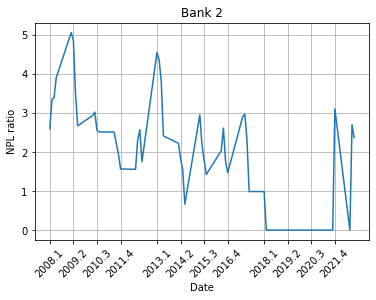

In [63]:
excel_file = "Capital_Merged2.xlsx"  # Replace with the actual file path
sheet_name = "NPL ratio"
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the specified sheet into a DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)
df.interpolate(method='linear', axis=1, limit_direction='both', limit=2, inplace=True)
df.fillna(method="bfill", inplace=True)
print(df)
# Continue with plotting code
NPL = df.iloc[:,1:]
date = df["Date"]
Bank2 = df['Bank 2']
plt.plot(date, Bank2)
plt.title('Bank 2')
plt.xlabel('Date')
plt.ylabel('NPL ratio')
plt.grid(True)

# Set a subset of ticks to make labels less crowded
plt.xticks(date[::5], rotation=45)

plt.show()


In [64]:
print(df)

      Date   Bank 1   Bank 2   Bank 3    Bank 4   Bank 5    Bank 6    Bank 7  \
0   2008.1  0.00000  2.59021  5.66736   7.15595  0.00000   0.00000   7.90352   
1   2008.2  0.00000  3.34015  5.73038  14.46996  0.00000   0.00000   5.59829   
2   2008.3  0.00000  3.39541  4.67483  16.56776  0.00000   0.39333   6.76417   
3   2008.4  0.00000  3.89765  4.03372   7.40578  0.00000   0.00000   5.53743   
4   2009.1  0.00000  5.05689  3.66804   7.67060  0.00000   0.00000   7.85822   
5   2009.2  0.00000  4.85466  3.41219   8.69337  0.00000   0.00000   8.50617   
6   2009.3  0.00000  3.49738  3.39806   6.70817  0.00000   0.00000   6.79579   
7   2009.4  2.69629  2.66791  3.24103   5.38342  0.00000   0.00000   6.71323   
8   2010.1  0.23718  2.93105  3.42675   2.23560  0.00000   0.00000   8.00796   
9   2010.2  0.13250  3.01825  3.75681   2.07392  0.00000   0.38203  10.16894   
10  2010.3  0.11514  2.55460  3.49703   1.81065  0.00000   0.00000   7.39571   
11  2010.4  0.10767  2.51146  3.37204   

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




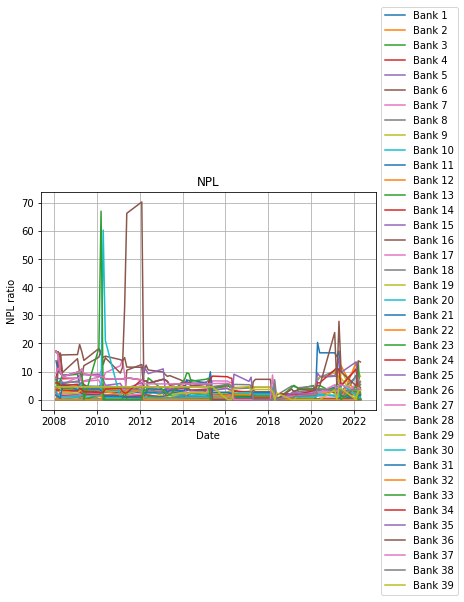

In [66]:
plt.plot(date, NPL)
plt.legend(df.iloc[:,1:].columns)
legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('NPL')
plt.xlabel('Date')
plt.ylabel('NPL ratio')
plt.grid(True)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
NPLnorm = scaler.fit_transform(NPL)

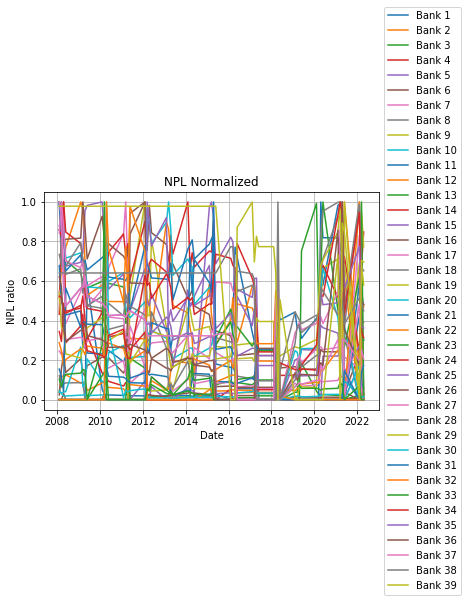

In [68]:
plt.plot(date, NPLnorm)
plt.legend(df.iloc[:,1:].columns)
legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('NPL Normalized')
plt.xlabel('Date')
plt.ylabel('NPL ratio')
plt.grid(True)

(array([16., 11.,  6.,  2.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([0.24916343, 0.71411996, 1.17907649, 1.64403302, 2.10898955,
        2.57394608, 3.03890261, 3.50385914, 3.96881567, 4.4337722 ,
        4.89872873]),
 <BarContainer object of 10 artists>)

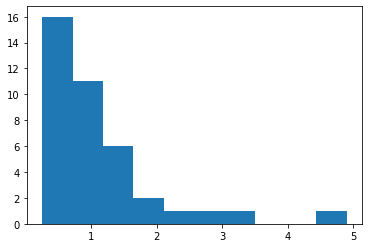

In [71]:
CVAR = np.std(NPL)/np.mean(NPL)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'CVAR' with the name of your Series or column
# Create a histogram
plt.hist(CVAR)

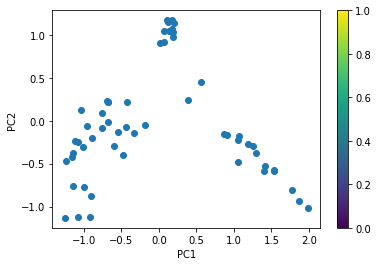

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# missing_values = np.isnan(NPLnorm)

# for j in range(NPLnorm.shape[1]):
#     if missing_values[0, j]:
#         # Handle missing values in the first row as needed (e.g., replace with 0 or a default value)
#         NPLnorm[0, j] = 0
# for i in range(1, NPLnorm.shape[0]):
#     for j in range(NPLnorm.shape[1]):
#         if missing_values[i, j]:
#             matrix[i, j] = matrix[i-1, j]


NPLnormhat = pca.inverse_transform(PC)

pca = PCA(n_components=5)
PC = pca.fit_transform(NPLnorm)
plt.scatter(PC[:,0], PC[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Principal Components for NPL')

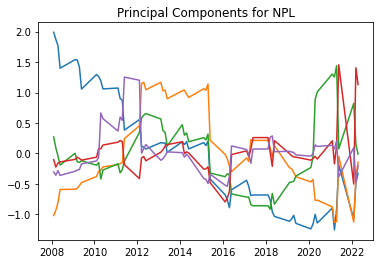

In [73]:
plt.plot(date,PC)
plt.title('Principal Components for NPL')


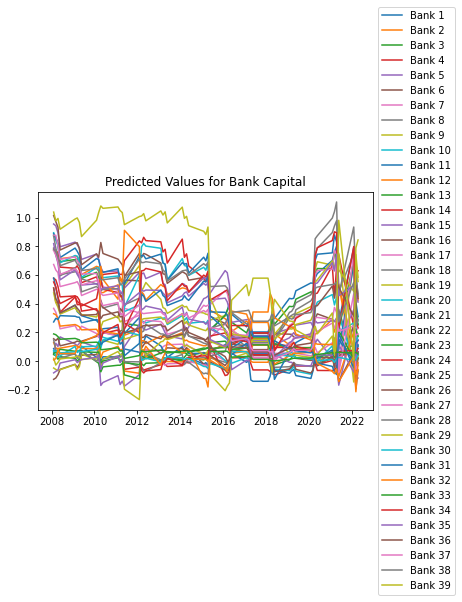

In [74]:
NPLnormhat = pca.inverse_transform(PC)
plt.plot(date, NPLnormhat)
plt.title('Predicted Values for Bank Capital')
plt.legend(df.iloc[:,1:].columns)

legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))


33.90994881519766


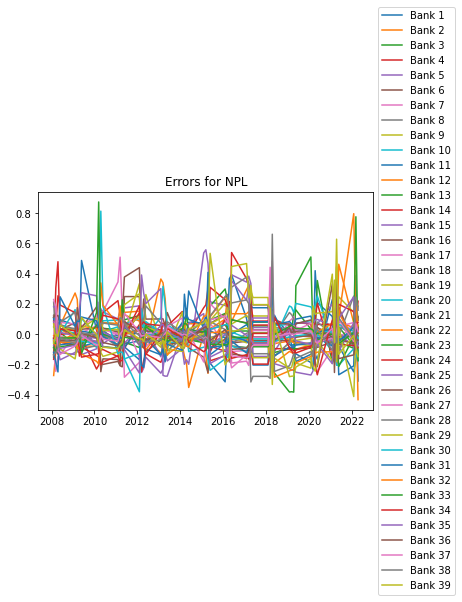

In [75]:
ERROR = NPLnorm - NPLnormhat
plt.plot(date,ERROR)
plt.title('Errors for NPL')
plt.legend(df.iloc[:,:].columns)
legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))
SEE = np.sum(ERROR**2,axis=0)
SEE1 = np.sum(SEE)
print(SEE1)

In [76]:
variance_ratio = pca.explained_variance_ratio_
junk = np.var(NPLnormhat,0)
junk1 = np.var(NPLnorm,0)
RSQ_PC_NPL = junk/junk1
print(RSQ_PC_NPL)
print(np.min(RSQ_PC_NPL))
# Calculate the total percentage of the variance captured by the first two principal components
total_variance = np.sum(variance_ratio[:2])
percent_total_variance = total_variance * 100
print(percent_total_variance)

[0.71422433 0.70312477 0.94689308 0.75782885 0.41310383 0.83083985
 0.74800305 0.95554051 0.8453895  0.95695852 0.80148559 0.55063497
 0.7125234  0.82161534 0.85905024 0.60131167 0.77120661 0.9396672
 0.74189305 0.79596507 0.95601123 0.44295683 0.13021703 0.75079431
 0.7863331  0.95869654 0.8833307  0.83184586 0.56612163 0.19259146
 0.64689033 0.7482329  0.11863223 0.78055169 0.79395212 0.65535236
 0.80026557 0.48252409 0.75682912]
0.11863222586864673
53.5968701117733


In [77]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load data into a NumPy array
# Define the dimensions of the input and latent spaces
input_dim = NPLnorm.shape[1]
latent_dim = 1

# Define the encoder

# inputs = Input(shape=(input_dim,))
# encoded = Dense(100, activation='relu')(inputs)
# encoded = Dense(50, activation='relu')(encoded)
# encoded = Dense(2, activation='relu')(encoded)
# decoded = Dense(50, activation='relu')(encoded)
# decoded = Dense(100, activation='relu')(encoded)
# decoded = Dense(input_dim, activation='linear')(decoded)

inputs = Input(shape=(input_dim,))
encoded = Dense(50, activation='relu')(inputs)
encoded = Dense(5, activation='sigmoid')(encoded)
decoded = Dense(50, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)
 
autoencoder = Model(inputs, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mae')

# Train the autoencoder
autoencoder.fit(NPLnorm,NPLnorm, epochs=10000)

# Extract the encoder model for dimensionality reduction
encoder = Model(inputs, encoded)
encoded_NPLnorm = encoder.predict(NPLnorm)

Epoch 1/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 2/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 3/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3413
Epoch 4/10000
2/2 [==============================] - 0s 1ms/step - loss: 0.3392
Epoch 5/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3371
Epoch 6/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3349
Epoch 7/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3327
Epoch 8/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3303
Epoch 9/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3279
Epoch 10/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3253
Epoch 11/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.3226
Epoch 12/10000
2/2 [==============================] - 0s 998us/step - loss: 0.3197
Epoch 13/10000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.1672
Epoch 102/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 103/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1669
Epoch 104/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 105/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1667
Epoch 106/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1666
Epoch 107/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1664
Epoch 108/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1663
Epoch 109/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1661
Epoch 110/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1660
Epoch 111/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1658
Epoch 112/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1656
Epoch 113/10000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.1428
Epoch 201/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1425
Epoch 202/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1422
Epoch 203/10000
2/2 [==============================] - 0s 998us/step - loss: 0.1418
Epoch 204/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1416
Epoch 205/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1413
Epoch 206/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1409
Epoch 207/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1406
Epoch 208/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1403
Epoch 209/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1400
Epoch 210/10000
2/2 [==============================] - 0s 998us/step - loss: 0.1397
Epoch 211/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1394
Epoch 212/10000
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.1157
Epoch 300/10000
2/2 [==============================] - 0s 998us/step - loss: 0.1155
Epoch 301/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1153
Epoch 302/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1152
Epoch 303/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1151
Epoch 304/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1149
Epoch 305/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1148
Epoch 306/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1147
Epoch 307/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1145
Epoch 308/10000
2/2 [==============================] - 0s 998us/step - loss: 0.1144
Epoch 309/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1142
Epoch 310/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1141
Epoch 311/10000
2/2 

2/2 [==============================] - 0s 998us/step - loss: 0.1048
Epoch 399/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1047
Epoch 400/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1046
Epoch 401/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1045
Epoch 402/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1044
Epoch 403/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1044
Epoch 404/10000
2/2 [==============================] - 0s 997us/step - loss: 0.1043
Epoch 405/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1042
Epoch 406/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1041
Epoch 407/10000
2/2 [==============================] - 0s 998us/step - loss: 0.1041
Epoch 408/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1040
Epoch 409/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 410/10000
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.0992
Epoch 498/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0992
Epoch 499/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0992
Epoch 500/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0991
Epoch 501/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0991
Epoch 502/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0990
Epoch 503/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0989
Epoch 504/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0989
Epoch 505/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0989
Epoch 506/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0988
Epoch 507/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0987
Epoch 508/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0987
Epoch 509/10000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.0939
Epoch 597/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0939
Epoch 598/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0938
Epoch 599/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0937
Epoch 600/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0937
Epoch 601/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 602/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0935
Epoch 603/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0935
Epoch 604/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 605/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 606/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0933
Epoch 607/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0933
Epoch 608/10000
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.0878
Epoch 696/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0877
Epoch 697/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0877
Epoch 698/10000
2/2 [==============================] - 0s 993us/step - loss: 0.0876
Epoch 699/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 700/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 701/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 702/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 703/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 704/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0875
Epoch 705/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0874
Epoch 706/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0873
Epoch 707/10000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.0846
Epoch 795/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0846
Epoch 796/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0846
Epoch 797/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0846
Epoch 798/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0845
Epoch 799/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0845
Epoch 800/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0845
Epoch 801/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0845
Epoch 802/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0845
Epoch 803/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0844
Epoch 804/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0844
Epoch 805/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0844
Epoch 806/10000
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.0828
Epoch 894/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 895/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 896/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 897/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0827
Epoch 898/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 899/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 900/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0826
Epoch 901/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0825
Epoch 902/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0825
Epoch 903/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0824
Epoch 904/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0824
Epoch 905/10000
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.0800
Epoch 993/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0800
Epoch 994/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0799
Epoch 995/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0800
Epoch 996/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 997/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0800
Epoch 998/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0799
Epoch 999/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 1000/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 1001/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0799
Epoch 1002/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 1003/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 1004/10000
2/2

2/2 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 1091/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 1092/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 1093/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0783
Epoch 1094/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0783
Epoch 1095/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0783
Epoch 1096/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0783
Epoch 1097/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0783
Epoch 1098/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0783
Epoch 1099/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0783
Epoch 1100/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0782
Epoch 1101/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0782
Epoch 1102/10000


2/2 [==============================] - 0s 998us/step - loss: 0.0771
Epoch 1189/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0771
Epoch 1190/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 1191/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 1192/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 1193/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0771
Epoch 1194/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 1195/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 1196/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 1197/10000
2/2 [==============================] - 0s 999us/step - loss: 0.0770
Epoch 1198/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 1199/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 1200/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0763
Epoch 1287/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 1288/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 1289/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0763
Epoch 1290/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 1291/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0762
Epoch 1292/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 1293/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 1294/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 1295/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 1296/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0761
Epoch 1297/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0762
Epoch 1298/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 1385/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 1386/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 1387/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0756
Epoch 1388/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 1389/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0756
Epoch 1390/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 1391/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 1392/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 1393/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 1394/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 1395/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0757
Epoch 1396/10000


2/2 [==============================] - 0s 998us/step - loss: 0.0751
Epoch 1483/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0752
Epoch 1484/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 1485/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 1486/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0751
Epoch 1487/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 1488/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 1489/10000
2/2 [==============================] - 0s 1ms/step - loss: 0.0751
Epoch 1490/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0752
Epoch 1491/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0751
Epoch 1492/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 1493/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0751
Epoch 1494/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 1581/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 1582/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 1583/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 1584/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0746
Epoch 1585/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 1586/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 1587/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 1588/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 1589/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0745
Epoch 1590/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 1591/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 1592/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 1679/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0742
Epoch 1680/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0742
Epoch 1681/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 1682/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0742
Epoch 1683/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 1684/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 1685/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 1686/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 1687/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0741
Epoch 1688/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 1689/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0741
Epoch 1690/

2/2 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 1777/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 1778/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0738
Epoch 1779/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0738
Epoch 1780/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 1781/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0738
Epoch 1782/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 1783/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0738
Epoch 1784/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 1785/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 1786/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0737
Epoch 1787/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 1788/

2/2 [==============================] - 0s 1ms/step - loss: 0.0736
Epoch 1875/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 1876/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 1877/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0735
Epoch 1878/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 1879/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 1880/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0734
Epoch 1881/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 1882/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 1883/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0734
Epoch 1884/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 1885/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 1886/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0730
Epoch 1973/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0731
Epoch 1974/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0730
Epoch 1975/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0731
Epoch 1976/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0731
Epoch 1977/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0730
Epoch 1978/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0730
Epoch 1979/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0731
Epoch 1980/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0731
Epoch 1981/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0731
Epoch 1982/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0731
Epoch 1983/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0731
Epoch 1984/

2/2 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 2071/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 2072/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 2073/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0727
Epoch 2074/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 2075/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 2076/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 2077/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 2078/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0727
Epoch 2079/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0727
Epoch 2080/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 2081/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 2082/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 2169/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 2170/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 2171/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0724
Epoch 2172/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0723
Epoch 2173/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0723
Epoch 2174/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0724
Epoch 2175/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 2176/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 2177/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0723
Epoch 2178/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0723
Epoch 2179/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0723
Epoch 2180/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 2267/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 2268/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0721
Epoch 2269/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 2270/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 2271/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0721
Epoch 2272/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 2273/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0721
Epoch 2274/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 2275/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0721
Epoch 2276/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0722
Epoch 2277/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 2278/

2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2365/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2366/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2367/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0718
Epoch 2368/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0718
Epoch 2369/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2370/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0718
Epoch 2371/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2372/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2373/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0718
Epoch 2374/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2375/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0718
Epoch 2376/

2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2463/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0719
Epoch 2464/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2465/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0718
Epoch 2466/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0719
Epoch 2467/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0716
Epoch 2468/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 2469/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0717
Epoch 2470/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 2471/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 2472/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 2473/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 2474/10

2/2 [==============================] - 0s 999us/step - loss: 0.0714
Epoch 2561/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0713
Epoch 2562/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 2563/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 2564/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0714
Epoch 2565/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 2566/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 2567/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0713
Epoch 2568/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 2569/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 2570/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0713
Epoch 2571/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 2572/

2/2 [==============================] - 0s 997us/step - loss: 0.0712
Epoch 2659/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 2660/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 2661/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 2662/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 2663/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0711
Epoch 2664/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 2665/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0711
Epoch 2666/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0711
Epoch 2667/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0711
Epoch 2668/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0711
Epoch 2669/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 2670/1000

2/2 [==============================] - 0s 997us/step - loss: 0.0709
Epoch 2757/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0709
Epoch 2758/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 2759/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 2760/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2761/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0709
Epoch 2762/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2763/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2764/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2765/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2766/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 2767/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0709
Epoch 2768/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 2855/10000
2/2 [==============================] - 0s 992us/step - loss: 0.0707
Epoch 2856/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 2857/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 2858/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0707
Epoch 2859/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 2860/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 2861/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0707
Epoch 2862/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 2863/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 2864/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 2865/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0707
Epoch 2866/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0704
Epoch 2953/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0703
Epoch 2954/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0703
Epoch 2955/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0701
Epoch 2956/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0701
Epoch 2957/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 2958/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 2959/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0699
Epoch 2960/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch 2961/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 2962/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0698
Epoch 2963/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0698
Epoch 2964/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0696
Epoch 3051/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0697
Epoch 3052/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0696
Epoch 3053/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0697
Epoch 3054/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0697
Epoch 3055/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 3056/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0696
Epoch 3057/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0696
Epoch 3058/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0696
Epoch 3059/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0696
Epoch 3060/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0696
Epoch 3061/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0696
Epoch 3062/

2/2 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 3149/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 3150/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 3151/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 3152/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 3153/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 3154/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0694
Epoch 3155/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0693
Epoch 3156/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 3157/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 3158/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0694
Epoch 3159/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 3160/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 3247/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0693
Epoch 3248/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0693
Epoch 3249/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 3250/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 3251/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 3252/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0693
Epoch 3253/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0692
Epoch 3254/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 3255/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0693
Epoch 3256/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 3257/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 3258/

2/2 [==============================] - 0s 997us/step - loss: 0.0690
Epoch 3345/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3346/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3347/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 3348/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 3349/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0690
Epoch 3350/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 3351/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3352/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3353/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3354/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0690
Epoch 3355/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0690
Epoch 3356/10

2/2 [==============================] - 0s 998us/step - loss: 0.0689
Epoch 3443/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 3444/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3445/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 3446/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 3447/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0690
Epoch 3448/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3449/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3450/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3451/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3452/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0689
Epoch 3453/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 3454/1000

2/2 [==============================] - 0s 998us/step - loss: 0.0688
Epoch 3541/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3542/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3543/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3544/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0688
Epoch 3545/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3546/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3547/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 3548/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3549/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0688
Epoch 3550/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3551/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3552/1000

2/2 [==============================] - 0s 998us/step - loss: 0.0688
Epoch 3639/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3640/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0689
Epoch 3641/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3642/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 3643/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0688
Epoch 3644/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3645/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3646/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0688
Epoch 3647/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3648/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 3649/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 3650/10

2/2 [==============================] - 0s 997us/step - loss: 0.0686
Epoch 3737/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 3738/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0687
Epoch 3739/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0686
Epoch 3740/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 3741/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 3742/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 3743/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 3744/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 3745/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 3746/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 3747/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 3748/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 3835/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0685
Epoch 3836/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 3837/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 3838/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0685
Epoch 3839/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 3840/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 3841/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 3842/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 3843/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 3844/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 3845/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 3846/10000
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 3933/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 3934/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0683
Epoch 3935/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 3936/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 3937/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 3938/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0683
Epoch 3939/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 3940/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 3941/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 3942/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0684
Epoch 3943/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 3944/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 4031/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0683
Epoch 4032/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 4033/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 4034/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 4035/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 4036/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 4037/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0683
Epoch 4038/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 4039/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 4040/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 4041/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0683
Epoch 4042/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 4129/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0682
Epoch 4130/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 4131/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0682
Epoch 4132/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0682
Epoch 4133/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 4134/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 4135/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 4136/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 4137/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 4138/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 4139/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0682
Epoch 4140/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 4227/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 4228/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 4229/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 4230/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 4231/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0681
Epoch 4232/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 4233/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 4234/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0681
Epoch 4235/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 4236/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 4237/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0681
Epoch 4238/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 4325/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 4326/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0680
Epoch 4327/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 4328/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 4329/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0681
Epoch 4330/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0681
Epoch 4331/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 4332/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 4333/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 4334/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 4335/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0680
Epoch 4336/10

2/2 [==============================] - 0s 996us/step - loss: 0.0679
Epoch 4423/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0679
Epoch 4424/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 4425/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 4426/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0678
Epoch 4427/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0678
Epoch 4428/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 4429/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0679
Epoch 4430/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0678
Epoch 4431/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0678
Epoch 4432/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 4433/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 4434/

2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4521/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0678
Epoch 4522/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0678
Epoch 4523/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4524/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0678
Epoch 4525/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4526/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4527/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0678
Epoch 4528/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4529/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0677
Epoch 4530/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4531/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0677
Epoch 4532/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 4619/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 4620/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 4621/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 4622/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 4623/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0676
Epoch 4624/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0676
Epoch 4625/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4626/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 4627/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4628/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0677
Epoch 4629/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 4630/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4717/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4718/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 4719/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 4720/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 4721/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0675
Epoch 4722/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 4723/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 4724/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0675
Epoch 4725/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0675
Epoch 4726/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 4727/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 4728/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 4815/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4816/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 4817/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4818/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4819/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0674
Epoch 4820/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4821/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4822/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0674
Epoch 4823/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4824/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4825/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 4826/10000


2/2 [==============================] - 0s 997us/step - loss: 0.0674
Epoch 4913/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0674
Epoch 4914/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4915/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 4916/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0673
Epoch 4917/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 4918/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0673
Epoch 4919/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 4920/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0674
Epoch 4921/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 4922/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 4923/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 4924/

2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 5011/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 5012/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 5013/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5014/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5015/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 5016/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 5017/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0672
Epoch 5018/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 5019/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 5020/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 5021/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 5022/10000
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5109/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0672
Epoch 5110/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5111/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5112/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5113/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5114/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5115/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5116/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0672
Epoch 5117/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5118/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 5119/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0672
Epoch 5120/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5207/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0671
Epoch 5208/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5209/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5210/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5211/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0670
Epoch 5212/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5213/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5214/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0671
Epoch 5215/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5216/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5217/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5218/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5305/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5306/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5307/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5308/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5309/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0671
Epoch 5310/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 5311/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5312/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5313/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5314/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5315/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5316/10000
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5403/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5404/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0670
Epoch 5405/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5406/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5407/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5408/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5409/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5410/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5411/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0670
Epoch 5412/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 5413/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5414/10000


2/2 [==============================] - 0s 997us/step - loss: 0.0669
Epoch 5501/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5502/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5503/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0669
Epoch 5504/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5505/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0671
Epoch 5506/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5507/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5508/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5509/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5510/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0669
Epoch 5511/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5512/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5599/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5600/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5601/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0668
Epoch 5602/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5603/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5604/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5605/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5606/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5607/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0668
Epoch 5608/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5609/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5610/10000


2/2 [==============================] - 0s 997us/step - loss: 0.0668
Epoch 5697/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5698/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5699/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5700/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0668
Epoch 5701/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0668
Epoch 5702/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5703/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0668
Epoch 5704/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5705/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5706/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5707/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5708/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5795/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0668
Epoch 5796/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5797/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5798/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5799/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5800/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5801/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5802/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5803/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 5804/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0667
Epoch 5805/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5806/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5893/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5894/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5895/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5896/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5897/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0667
Epoch 5898/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5899/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0667
Epoch 5900/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 5901/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5902/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0666
Epoch 5903/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5904/1000

2/2 [==============================] - 0s 998us/step - loss: 0.0666
Epoch 5991/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5992/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5993/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0666
Epoch 5995/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5996/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5997/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5998/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 5999/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0666
Epoch 6000/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6001/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6002/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6089/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 6090/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6091/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6092/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6093/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6094/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6095/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6096/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6097/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6098/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0665
Epoch 6099/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0665
Epoch 6100/10000


2/2 [==============================] - 0s 998us/step - loss: 0.0666
Epoch 6187/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0666
Epoch 6188/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6189/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6190/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6191/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6192/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0667
Epoch 6193/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0666
Epoch 6194/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6195/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 6196/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 6197/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6198/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6285/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0665
Epoch 6286/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6287/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0664
Epoch 6288/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6289/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0665
Epoch 6290/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6291/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6292/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0665
Epoch 6293/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6294/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6295/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0664
Epoch 6296/

2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6383/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6384/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6385/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 6386/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6387/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6388/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6389/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0664
Epoch 6390/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6391/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6392/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0664
Epoch 6393/10000
2/2 [==============================] - 0s 986us/step - loss: 0.0664
Epoch 6394/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6481/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 6482/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6483/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6484/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6485/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6486/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6487/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6488/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6489/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0663
Epoch 6490/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6491/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6492/10000
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6579/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6580/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6581/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0663
Epoch 6582/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6583/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6584/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6585/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6586/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0663
Epoch 6587/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6588/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6589/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6590/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6677/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6678/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6679/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6680/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6681/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 6682/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6683/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6684/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 6685/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6686/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6687/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0662
Epoch 6688/10000
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6775/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6776/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6777/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0662
Epoch 6778/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6779/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6780/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0662
Epoch 6781/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6782/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0663
Epoch 6783/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6784/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6785/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0662
Epoch 6786/10

2/2 [==============================] - 0s 996us/step - loss: 0.0661
Epoch 6873/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6874/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6875/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6876/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6877/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0661
Epoch 6878/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6879/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0661
Epoch 6880/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0661
Epoch 6881/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6882/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6883/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6884/10

2/2 [==============================] - 0s 997us/step - loss: 0.0661
Epoch 6971/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6972/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6973/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6974/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6975/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0661
Epoch 6976/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0662
Epoch 6977/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6978/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6979/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6980/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0662
Epoch 6981/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 6982/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7069/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7070/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0660
Epoch 7071/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0660
Epoch 7072/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0659
Epoch 7073/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7074/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7075/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0659
Epoch 7076/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0660
Epoch 7077/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7078/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7079/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0660
Epoch 7080/10000


2/2 [==============================] - 0s 996us/step - loss: 0.0659
Epoch 7167/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7168/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0659
Epoch 7169/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7170/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7171/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0658
Epoch 7172/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7173/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7174/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0658
Epoch 7175/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7176/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7177/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7178/10

2/2 [==============================] - 0s 997us/step - loss: 0.0659
Epoch 7265/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0659
Epoch 7266/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7267/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7268/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7269/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0658
Epoch 7270/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7271/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0658
Epoch 7272/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0658
Epoch 7273/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7274/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0658
Epoch 7275/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 727

2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7363/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7364/10000
2/2 [==============================] - 0s 995us/step - loss: 0.0658
Epoch 7365/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7366/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0658
Epoch 7367/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0658
Epoch 7368/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7369/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0659
Epoch 7370/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7371/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7372/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7373/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 7374/1000

2/2 [==============================] - 0s 998us/step - loss: 0.0656
Epoch 7461/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7462/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0657
Epoch 7463/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0657
Epoch 7464/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0656
Epoch 7465/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7466/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7467/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7468/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7469/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7470/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7471/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7472/10000


2/2 [==============================] - 0s 997us/step - loss: 0.0656
Epoch 7559/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7560/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7561/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7562/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0656
Epoch 7563/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7564/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7565/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7566/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7567/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7568/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0656
Epoch 7569/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7570/1000

2/2 [==============================] - 0s 997us/step - loss: 0.0655
Epoch 7657/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7658/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7659/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7660/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0657
Epoch 7661/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7662/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7663/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 7664/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0656
Epoch 7665/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0655
Epoch 7666/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7667/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7668/10000


2/2 [==============================] - 0s 997us/step - loss: 0.0655
Epoch 7755/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 7756/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7757/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 7758/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0654
Epoch 7759/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0654
Epoch 7760/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 7761/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 7762/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 7763/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 7764/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0653
Epoch 7765/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 7766/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 7853/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0653
Epoch 7854/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 7855/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 7856/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0653
Epoch 7857/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 7858/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 7859/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0653
Epoch 7860/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 7861/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0653
Epoch 7862/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 7863/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0653
Epoch 7864/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0651
Epoch 7951/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 7952/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 7953/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 7954/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0651
Epoch 7955/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 7956/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0652
Epoch 7957/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0652
Epoch 7958/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 7959/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 7960/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0652
Epoch 7961/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0651
Epoch 7962/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 8049/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0648
Epoch 8050/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 8051/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 8052/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 8053/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 8054/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0648
Epoch 8055/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 8056/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 8057/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 8058/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 8059/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 8060/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 8147/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 8148/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0646
Epoch 8149/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 8150/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 8151/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0645
Epoch 8152/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 8153/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 8154/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 8155/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0646
Epoch 8156/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 8157/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 8158/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 8245/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 8246/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0643
Epoch 8247/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 8248/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 8249/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 8250/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0643
Epoch 8251/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0643
Epoch 8252/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 8253/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 8254/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0644
Epoch 8255/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 8256/10

2/2 [==============================] - 0s 997us/step - loss: 0.0641
Epoch 8343/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 8344/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 8345/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 8346/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 8347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 8348/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 8349/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0640
Epoch 8350/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 8351/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 8352/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0640
Epoch 8353/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 8354/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 8441/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 8442/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 8443/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0640
Epoch 8444/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 8445/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 8446/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 8447/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 8448/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 8449/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0638
Epoch 8450/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 8451/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 8452/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 8539/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0637
Epoch 8540/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 8541/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0637
Epoch 8542/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 8543/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 8544/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0637
Epoch 8545/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 8546/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 8547/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 8548/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 8549/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 8550/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 8637/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 8638/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 8639/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 8640/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 8641/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 8642/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 8643/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0635
Epoch 8644/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 8645/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0635
Epoch 8646/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 8647/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 8648/10000


2/2 [==============================] - 0s 998us/step - loss: 0.0634
Epoch 8735/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 8736/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 8737/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0634
Epoch 8738/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0634
Epoch 8739/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0634
Epoch 8740/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0633
Epoch 8741/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0634
Epoch 8742/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0634
Epoch 8743/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 8744/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 8745/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0634
Epoch 8746/10

2/2 [==============================] - 0s 997us/step - loss: 0.0631
Epoch 8833/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 8834/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 8835/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 8836/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 8837/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 8838/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 8839/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0632
Epoch 8840/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 8841/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0632
Epoch 8842/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0632
Epoch 8843/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 8844/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8931/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0630
Epoch 8932/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8933/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8934/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8935/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0630
Epoch 8936/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8937/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8938/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8939/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8940/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8941/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8942/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 9029/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 9030/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 9031/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0630
Epoch 9032/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 9033/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0629
Epoch 9034/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 9035/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 9036/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0630
Epoch 9037/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 9038/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 9039/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 9040/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 9127/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 9128/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 9129/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 9130/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 9131/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 9132/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 9133/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0626
Epoch 9134/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 9135/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 9136/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 9137/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 9138/10000
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 9225/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0626
Epoch 9226/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0627
Epoch 9227/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 9228/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 9229/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 9230/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 9231/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0624
Epoch 9232/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 9233/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 9234/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 9235/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0625
Epoch 9236/10

2/2 [==============================] - 0s 997us/step - loss: 0.0623
Epoch 9323/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 9324/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 9325/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 9326/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0623
Epoch 9327/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 9328/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 9329/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 9330/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 9331/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 9332/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 9333/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 9334/10000


2/2 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 9421/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0620
Epoch 9422/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0621
Epoch 9423/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 9424/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 9425/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 9426/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 9427/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 9428/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 9429/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0621
Epoch 9430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0620
Epoch 9431/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0620
Epoch 9432/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 9519/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 9520/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 9521/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0618
Epoch 9522/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 9523/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 9524/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0618
Epoch 9525/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 9526/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0619
Epoch 9527/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0620
Epoch 9528/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 9529/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0619
Epoch 9530/

2/2 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 9617/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 9618/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0618
Epoch 9619/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 9620/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 9621/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 9622/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0617
Epoch 9623/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 9624/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0616
Epoch 9625/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 9626/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 9627/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0616
Epoch 9628/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 9715/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0615
Epoch 9716/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 9717/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 9718/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 9719/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0615
Epoch 9720/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 9721/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0616
Epoch 9722/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 9723/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 9724/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 9725/10000
2/2 [==============================] - 0s 1ms/step - loss: 0.0614
Epoch 9726/1000

2/2 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 9813/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 9814/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0613
Epoch 9815/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 9816/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 9817/10000
2/2 [==============================] - 0s 998us/step - loss: 0.0612
Epoch 9818/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 9819/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 9820/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 9821/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 9822/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0614
Epoch 9823/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 9824/1000

2/2 [==============================] - 0s 996us/step - loss: 0.0612
Epoch 9911/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0611
Epoch 9912/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 9913/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 9914/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0612
Epoch 9915/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 9916/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 9917/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 9918/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 9919/10000
2/2 [==============================] - 0s 996us/step - loss: 0.0612
Epoch 9920/10000
2/2 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 9921/10000
2/2 [==============================] - 0s 997us/step - loss: 0.0610
Epoch 9922/

2/2 [==============================] - 0s 2ms/step
49.953017725060924
[0.76686187 0.73290924 0.88931609 1.02715488 0.04298989 0.73424298
 0.73326606 0.98173503 0.75672741 0.95832503 0.94937447 0.1088439
 0.65535555 0.72901812 0.6416289  0.13548367 0.7969878  0.97173409
 0.01478    0.98797998 1.03768163 0.46061087 0.02855822 0.97236926
 0.90823956 0.99422984 0.84506501 1.0151571  0.83004059 0.00494501
 0.59990452 0.21310129 0.05725923 0.99234396 0.84373854 0.35621174
 0.71951002 1.02535924 1.1332295 ]
1.1332295003228923


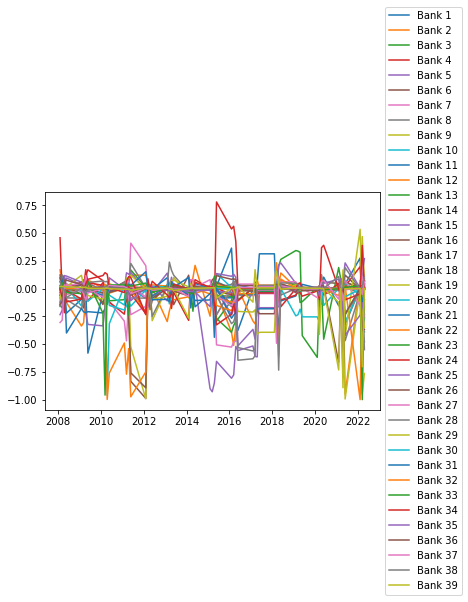

In [78]:
encoder = Model(inputs, encoded)
encoded_NPLnorm = encoder.predict(NPLnorm)
NPLnormhat1 = autoencoder.predict(NPLnorm)
plt.plot(date, NPLnormhat1-NPLnorm)
plt.legend(df.iloc[:,1:].columns)
legend = plt.legend(df.iloc[:, 1:].columns, loc='center left', bbox_to_anchor=(1, 0.5))

junk = np.var(NPLnormhat1,axis=0)

junk1 = np.var(NPLnorm, axis= 0)

ERROR = NPLnormhat1 - NPLnorm
SEE = np.sum(ERROR**2, axis=0)
SEE1 = np.sum(SEE)
print(SEE1)
RSQ_NPL_NPC = junk/junk1
print(RSQ_NPL_NPC)
print(np.max(RSQ_NPL_NPC))

(59, 39)
[1.2398847  0.7471612  1.3610653  2.3795297  1.7634465  0.9591224
 0.9914925  1.7658646  0.8409153  1.1037813  1.3811085  0.55075544
 1.2590413  0.5770528  0.4458935  1.0103501  1.1468687  1.8256713
 1.6776055  1.2383991  0.94429594 1.604672   1.5087935  1.3993175
 1.9453131  1.2558396  0.7376852  0.76779777 0.7249687  0.42234176
 1.0146672  2.6334789  0.59880984 0.60870814 0.6622854  0.5795128
 0.6347461  0.47544459 0.6449655 ]


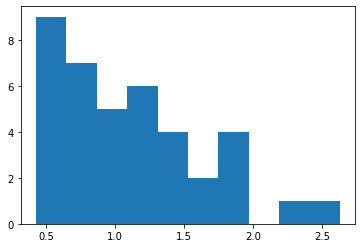

In [93]:
CVAR = np.std(NPL)/np.mean(NPL)
#plt.hist(CVAR1)

NPLhat1 = scaler.inverse_transform(NPLnormhat1)
print(NPLhat1.shape)
CVAR1 = np.std(NPLhat1,axis=0)/np.mean(NPLhat1,axis=0)
plt.hist(CVAR1)
print(CVAR1)

(array([16., 11.,  6.,  2.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([0.24916343, 0.71411996, 1.17907649, 1.64403302, 2.10898955,
        2.57394608, 3.03890261, 3.50385914, 3.96881567, 4.4337722 ,
        4.89872873]),
 <BarContainer object of 10 artists>)

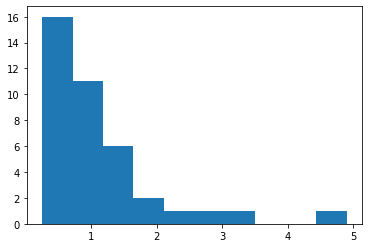

In [94]:
plt.hist(CVAR)

In [95]:
import numpy as np

# Count the number of zeros in the entire matrix
total_zeros = np.count_nonzero(NPL == 0)

# Calculate the total number of elements in the matrix
total_elements = NPL.size

# Calculate the percentage of zeros
percentage_zeros = (total_zeros / total_elements) * 100
print(percentage_zeros)


28.596262494567583


In [98]:
import pandas as pd

# Assuming NPL is a DataFrame
# Count the number of zeros in the entire DataFrame
total_zeros = (NPL == 0).sum().sum()

# Calculate the total number of elements in the DataFrame
total_elements = NPL.size

# Calculate the percentage of zeros in the entire DataFrame
percentage_zeros = (total_zeros / total_elements) * 100

# Calculate the percentage of zeros in each column
percentage_zeros_per_column = ((NPL == 0).sum() / NPL.shape[0]) * 100
print(percentage_zeros_per_column)


Bank 1     18.644068
Bank 2     25.423729
Bank 3      6.779661
Bank 4     69.491525
Bank 5     61.016949
Bank 6     22.033898
Bank 7      1.694915
Bank 8     69.491525
Bank 9     27.118644
Bank 10    42.372881
Bank 11    18.644068
Bank 12     1.694915
Bank 13    59.322034
Bank 14    18.644068
Bank 15     3.389831
Bank 16    22.033898
Bank 17    42.372881
Bank 18    30.508475
Bank 19    69.491525
Bank 20    25.423729
Bank 21    35.593220
Bank 22    54.237288
Bank 23    49.152542
Bank 24    55.932203
Bank 25    59.322034
Bank 26    20.338983
Bank 27     8.474576
Bank 28     8.474576
Bank 29     5.084746
Bank 30     3.389831
Bank 31    22.033898
Bank 32    62.711864
Bank 33    16.949153
Bank 34     5.084746
Bank 35    11.864407
Bank 36    15.254237
Bank 37    13.559322
Bank 38     8.474576
Bank 39    23.728814
dtype: float64
